# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
data = pd.read_csv('Categorical.csv')

In [3]:
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [4]:
data.continent.unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [7]:
data.continent=data.continent.map({'North America':1,'Asia':2,'Africa':3,'Europe':4,
                   'Sourth America':5,'Oceania':6,'Antractica':7,'Seven seas (open ocean)':8})

In [8]:
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,1.0
1,Afghanistan,66.004734,33.835231,2.0
2,Angola,17.537368,-12.293361,3.0
3,Anguilla,-63.064989,18.223959,1.0
4,Albania,20.049834,41.142450,4.0


## Select the features

In [15]:
x = data.iloc[:,3:4]
x

,continent
0,1.0
1,2.0
2,3.0
3,1.0
4,4.0
...,...
236,6.0
237,2.0
238,3.0
239,3.0


In [21]:
x.fillna(0,inplace=True);

In [22]:
x.isnull().sum()

continent    0
dtype: int64

## Clustering

Use 4 clusters initially.

In [23]:
kmeans = KMeans(4)

In [24]:
kmeans.fit(x)

KMeans(n_clusters=4)

## Clustering results

In [25]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 3, 0, 2, 0, 0, 0, 3, 2, 3, 1, 2, 1, 1, 2, 1, 0, 3, 0, 0, 0, 0,
       3, 0, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0, 2, 3, 0, 0,
       0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 3, 3, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 3, 1, 2, 0, 2, 0, 3, 0, 3, 3, 1, 0, 3, 3, 0, 3, 0, 2, 0, 3,
       3, 3, 3, 0, 3, 3, 1, 2, 3, 0, 3, 3, 3, 0, 0, 2, 0, 3, 0, 0, 0, 0,
       3, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 3, 0, 3, 1, 0, 0, 2, 1, 0, 3,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 3, 1, 1, 3, 3, 2, 1, 2, 3, 1, 1, 0, 2,
       3, 0, 2, 3, 1, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 3, 2, 0, 0, 3, 3, 3, 3, 1, 2, 0,
       3, 3, 0, 0, 0, 2, 2, 3, 0, 2, 2, 2, 2, 3, 1, 1, 1, 3, 0, 0, 0])

In [26]:
data_with_cluster = data.copy()

In [27]:
data_with_cluster['cluster'] = identified_clusters

In [28]:
data_with_cluster.head()

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,1.0,2
1,Afghanistan,66.004734,33.835231,2.0,3
2,Angola,17.537368,-12.293361,3.0,0
3,Anguilla,-63.064989,18.223959,1.0,2
4,Albania,20.049834,41.142450,4.0,0


## Plot the data

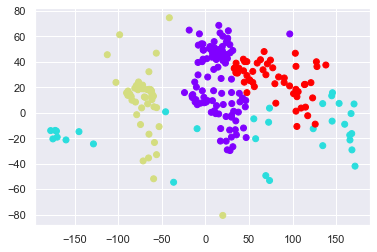

In [32]:
plt.scatter(x=data_with_cluster['Longitude'],y=data_with_cluster['Latitude'],c=data_with_cluster['cluster'],cmap='rainbow')

### How to clalulate the Withing Cluster Summation of Square

In [35]:
kmeans.inertia_

60.19230769230769

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.